# Predict App Popularity

Objective: 
- 1. Determine how different features are related to the app popularity
- 2. Explain how different features affect the decision
- 2. Output: app_id/popularity(High or Low)


Files:
- train.csv- data used for training along with target variable
- test.csv- data on which predictions are to be made

In [1]:
## import needed libraries/packages
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from IPython.display import display

## Data Wrangling & Visualization (Training Set)

In [2]:
## load training data
train = pd.read_csv("I:/3. Application/External_Application/Intern/Data/2022 Data/2022 IBM/Data Challenge/train.csv")

In [3]:
## view data
train.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,popularity
0,330090,PERSONALIZATION,4,511k,50+,0,Everyone,"December 31, 2016",1.4,High
1,226147,GAME,568391,5.2M,"5,000,000+",0,Teen,"July 1, 2014",4.3.1,High
2,107000,FAMILY,144,70M,"1,000+",$2.99,Teen,"January 26, 2018",1.0.0,High
3,217582,FAMILY,1499466,96M,"10,000,000+",0,Teen,"July 24, 2018",1.25.0,High
4,370113,DATING,84,4.5M,"1,000+",0,Mature 17+,"July 6, 2018",8.2,High


In [4]:
## check the size of the dataset
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

Number of rows: 1975
Number of columns: 10


In [5]:
## explore columns
train.columns

Index(['app_id', 'category', 'reviews', 'size', 'installs', 'price',
       'suitable_for', 'last_update', 'latest_ver', 'popularity'],
      dtype='object')

In [6]:
## check data type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   app_id        1975 non-null   int64 
 1   category      1975 non-null   object
 2   reviews       1975 non-null   int64 
 3   size          1975 non-null   object
 4   installs      1975 non-null   object
 5   price         1975 non-null   object
 6   suitable_for  1975 non-null   object
 7   last_update   1975 non-null   object
 8   latest_ver    1971 non-null   object
 9   popularity    1975 non-null   object
dtypes: int64(2), object(8)
memory usage: 154.4+ KB


In [7]:
## check missing values
## I do not remove NAs here 
## there are 4 rows with NAs in total 
## the number is relatively small
## there may be NA in the test set as well

train.isna().sum()

app_id          0
category        0
reviews         0
size            0
installs        0
price           0
suitable_for    0
last_update     0
latest_ver      4
popularity      0
dtype: int64

In [8]:
## create the list of numerical and categorical variables
var_list_n = ['app_id', 'reviews']
var_list_c = ['category', 'size', 'installs', 'price', 'suitable_for', 'last_update', 'latest_ver', 'popularity']

### Explore Numerical Variables

In [9]:
## descriptive information (numerical)
# train.describe()
# train[['app_id', 'reviews']].describe()
# train[var_list_n].describe()

###### - Function 1: Descriptive Statistics

In [10]:
## descriptive information (numerical)
def num_descriptive(data, var_list):
    
    '''
    This is a function to return the table of descriptive statistics for numerical variables/features
    Based on numpy
    '''

    var_des_list = []
    for nvar in var_list:
        nvar_des = {"Variable": nvar,
                    "Median": np.median(data[nvar]),
                    "Mean": np.average(data[nvar]),
                    "Standard Deviation": np.std(data[nvar]),
                    "Minimum": np.amin(data[nvar]),
                    "Maximum": np.amax(data[nvar]),
                    "Range": np.amax(data[nvar]) - np.amin(data[nvar]), 
                    "Kurtosis": kurtosis(data[nvar]),
                    "Skewness": skew(data[nvar])
                   }
        var_des_list.append(nvar_des)
    return var_des_list

In [11]:
display(pd.DataFrame(num_descriptive(train, var_list_n)))

,Variable,Median,Mean,Standard Deviation,Minimum,Maximum,Range,Kurtosis,Skewness
0,app_id,481867.0,490685.787342,2.880260e+05,1160,999218,998058,-1.190782,0.034026
1,reviews,516.0,198816.162532,1.493712e+06,1,44891723,44891722,476.676102,18.911591


###### - Function 2: Boxplot Loop over a list of Variables

In [12]:
# ## boxplot numerical variables
# ## without subplot
# ## problem: only show the last plot
# def num_plot(data, var_list):
#     '''
#     This is a function to return the boxplot of numerical variables/features
#     Based on matplotlib.pyplot and seaborn
#     '''
#     fig = plt.plot()
#     for i in range(len(var_list)):
#         sns.boxplot(data = data, y = var_list[i]).set(
#         xlabel = var_list[i], 
#         ylabel = '')

#     plt.title('Numerical Data Distribution - Boxplot', fontsize = 30)
#     return plt.show()
# #     return fig

In [13]:
# ## boxplot numerical variables
# ## testing version
# def num_plot(data, var_list):
    
#     '''
#     This is a function to return the boxplot of numerical variables/features
#     Based on matplotlib.pyplot and seaborn
#     '''
#     ## create a figure and a set of subplots
#     nc_init = 2
#     nr_init = int(len(var_list)/nc)
#     fig, ax = plt.subplots(nrows = nr_init, ncols = nc_init, figsize = (8, 4))
# #     colors = ['#3C91E6', '#76F7BF', '#34F6F2', '#59C9A5']

#     nr_plot = 0 ## set the location(row) of the subplots
#     for i in range(len(var_list)):
#         nc_plot = i - (2*nr_plot) ## set the location(colunm) of the subplots
        
#         ## if there are less than two subplots
#         if nr_init == 1:
#             sns.boxplot(data = data, y = var_list[i], ax = ax[nc_plot])  
#             ax[nc_plot].set_xlabel(var_list[i], fontsize = 12)
#             ax[nc_plot].set_ylabel('')
        
#         ## if there more less than two subplots   
#         elif nr_init > 1:
# #             print('i:', i)
# #             print(nr_plot == 0)
# #             print(nc_plot != 0)
# #             print((nr_plot == 0) and (nc_plot != 0))
#             print("row:", nr_plot)
#             print("col:", nc_plot)
# #             sns.boxplot(data = data, y = var_list[i], ax = ax[nr_plot, nc_plot])  
# #             sns.boxplot(data = data, y = var_list[i], ax = ax[nr_plot, nc_plot], color = colors[i])
# #             ax[nr_plot, nc_plot].set_xlabel(var_list[i], fontsize = 12)
# #             ax[nr_plot, nc_plot].set_ylabel('')
    
#             ## update the location(row)
#             if i%2 == 1 and nc_plot != 0:
#                 print("row + 1")
#                 nr_plot += 1
# #             if i != 0 and i%2 == 1 and nc_plot != 0:
# #                 print("row + 1")
# #                 nr_plot += 1
#             else : 
#                 print("same row")
#                 continue

#     plt.suptitle('Numerical Data Distribution - Boxplot', fontsize = 16)
# #     return fig


In [14]:
## boxplot numerical variables
## final version
def num_boxplot(data, var_list):
    
    '''
    This is a function to return the boxplot of numerical variables/features
    Based on matplotlib.pyplot and seaborn
    '''
    
    ## create a figure and a set of subplots
    nc_init = 2
#     nr_init = int(len(var_list)/nc_init)
    nr_init = math.ceil(len(var_list)/nc_init) 
    
    if nr_init == 1:
        fig, ax = plt.subplots(nrows = nr_init, ncols = nc_init, figsize = (8, 6))
        fig.tight_layout(pad = 6)
    elif nr_init > 1:
        fig, ax = plt.subplots(nrows = nr_init, ncols = nc_init, figsize = (nr_init*3, nc_init*9))
        fig.tight_layout(pad = 6)

    nr_plot = 0 ## set the location(row) of the subplots
    for i in range(len(var_list)):
        nc_plot = i - (2*nr_plot) ## set the location(colunm) of the subplots
        
        ## if there are less than two subplots
        if nr_init == 1:
            sns.boxplot(data = data, y = var_list[i], ax = ax[nc_plot])  
            ax[nc_plot].set_xlabel(var_list[i], fontsize = 12)
            ax[nc_plot].set_ylabel('Values', fontsize = 12)
        
        ## if there more less than two subplots   
        elif nr_init > 1:
            sns.boxplot(data = data, y = var_list[i], ax = ax[nr_plot, nc_plot])  
            ax[nr_plot, nc_plot].set_xlabel(var_list[i], fontsize = 12)
            ax[nr_plot, nc_plot].set_ylabel('Values', fontsize = 12)
    
            ## update the location(row)
            if i%2 == 1 and nc_plot != 0:
                nr_plot += 1
            else : 
                continue

    plt.suptitle('Numerical Data Distribution - Boxplot', fontsize = 16)

###### - Function 3: Histogram Loop over a list of Variables

In [15]:
## histplot numerical variables
## final version
def num_hist(data, var_list):
    
    '''
    This is a function to return the histogram of numerical variables/features
    Based on matplotlib.pyplot and seaborn
    '''
    
    ## create a figure and a set of subplots
    nc_init = 2
    nr_init = math.ceil(len(var_list)/nc_init)
    
    if nr_init == 1:
        fig, ax = plt.subplots(nrows = nr_init, ncols = nc_init, figsize = (8, 6))
        fig.tight_layout(pad = 6)
    elif nr_init > 1:
        fig, ax = plt.subplots(nrows = nr_init, ncols = nc_init, figsize = (nr_init*3, nc_init*9))
        fig.tight_layout(pad = 6)

    nr_plot = 0 ## set the location(row) of the subplots
    for i in range(len(var_list)):
        nc_plot = i - (2*nr_plot) ## set the location(colunm) of the subplots
        
        ## if there are less than two subplots
        if nr_init == 1:
            sns.histplot(data = data, x = var_list[i], ax = ax[nc_plot])  
            ax[nc_plot].set_xlabel(var_list[i], fontsize = 12)
            ax[nc_plot].set_ylabel('Density', fontsize = 12)
        
        ## if there more less than two subplots   
        elif nr_init > 1:
            sns.histplot(data = data, x = var_list[i], ax = ax[nr_plot, nc_plot])  
            ax[nr_plot, nc_plot].set_xlabel(var_list[i], fontsize = 12)
            ax[nr_plot, nc_plot].set_ylabel('Density', fontsize = 12)
    
    
            ## update the location(row)
            if i%2 == 1 and nc_plot != 0:
                nr_plot += 1
            else : 
                continue

    plt.suptitle('Numerical Data Distribution - Histograms', fontsize = 16)

###### - Function 4: Distribution Plot Loop over a list of Variables

In [16]:
## check function: 'distplot'
## Warning: `distplot` is a deprecated function and will be removed in a future version. 
# sns.distplot(train['reviews'], hist = False, rug = True)
# sns.distplot(train['reviews'])

<AxesSubplot:xlabel='reviews', ylabel='Density'>

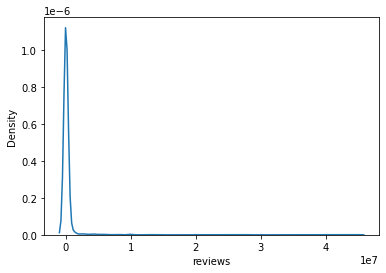

In [17]:
## check function: 'kdeplot'
sns.kdeplot(train['reviews'])

In [18]:
## distribution plots with kdeplot for numerical variables
## final version
## Note: `displot` is a figure-level function and does not accept the ax= paramter
def num_dist(data, var_list):
    
    '''
    This is a function to return the histogram of numerical variables/features
    Based on matplotlib.pyplot and seaborn
    '''
    
    ## create a figure and a set of subplots
    nc_init = 2
    nr_init = math.ceil(len(var_list)/nc_init)
    
    if nr_init == 1:
        fig, ax = plt.subplots(nrows = nr_init, ncols = nc_init, figsize = (8, 6))
        fig.tight_layout(pad = 6)
    elif nr_init > 1:
        fig, ax = plt.subplots(nrows = nr_init, ncols = nc_init, figsize = (nr_init*3, nc_init*9))
        fig.tight_layout(pad = 6)

    nr_plot = 0 ## set the location(row) of the subplots
    for i in range(len(var_list)):
        nc_plot = i - (2*nr_plot) ## set the location(colunm) of the subplots
        
        ## if there are less than two subplots
        if nr_init == 1:
            sns.kdeplot(data = data, x = var_list[i], ax = ax[nc_plot])  
            ax[nc_plot].set_xlabel(var_list[i], fontsize = 12)
            ax[nc_plot].set_ylabel('Density', fontsize = 12)
        
        ## if there more less than two subplots   
        elif nr_init > 1:
            sns.kdeplot(data = data, x = var_list[i], ax = ax[nr_plot, nc_plot])  
            ax[nr_plot, nc_plot].set_xlabel(var_list[i], fontsize = 12)
            ax[nr_plot, nc_plot].set_ylabel('Density', fontsize = 12)
    
            ## update the location(row)
            if i%2 == 1 and nc_plot != 0:
                nr_plot += 1
            else : 
                continue

    plt.suptitle('Numerical Data Distribution - Distribution Plot', fontsize = 16)

###### - Follow-ups: sns functions with other data

In [19]:
## check function: 'displot'
## Problem: no result for 'reviews'
# sns.displot(data = train, x = "reviews", kind = 'hist')
# sns.displot(data = train, x = "app_id", kind = 'hist')

- Plots

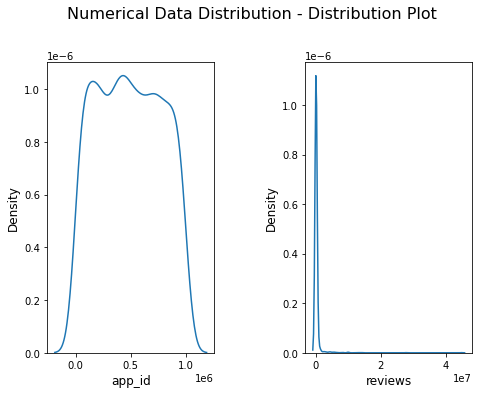

In [20]:
num_dist(train, var_list_n)

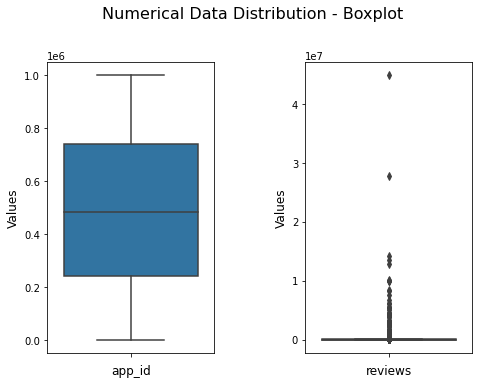

In [21]:
num_boxplot(train, var_list_n)

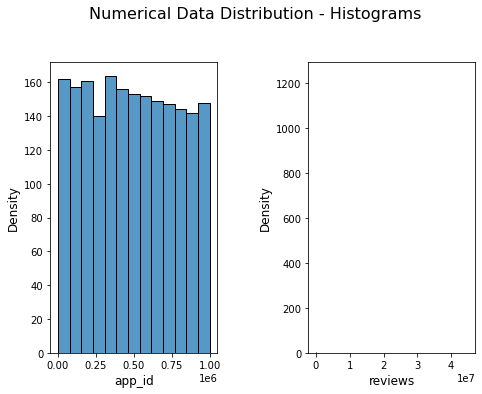

In [22]:
num_hist(train, var_list_n)

#### Generate New Features based on Numerical Variables

In [24]:
## add a new categorical variable based on 'reviews'
# train['review_c'] = pd.cut(train.reviews, bins = [0,100,10000,100000,1000000,50000000],
#                            labels = ['0.1k','10k','100k','1m','50m'])

train['review_c'] = pd.cut(train.reviews, bins = [0,100,10000,100000,1000000,50000000],
                           labels = [0.1, 10, 100, 1000, 50000])
train['review_c'] = train['review_c'].astype(int)

In [25]:
## add a new variable based on 'reviews' -->  log transformation
train['review_log'] = np.log2(train['reviews'])

### Explore Categorical Variables

In [26]:
## descriptive information (categorical)
# train[['category', 'size', 'installs', 'price', 'suitable_for', 'last_update', 'latest_ver', 'popularity']].describe()
train[var_list_c].describe()

,category,size,installs,price,suitable_for,last_update,latest_ver,popularity
count,1975,1975,1975,1975,1975,1975,1971,1975
unique,33,229,18,41,5,669,922,2
top,FAMILY,12M,"10,000+",0,Everyone,"August 3, 2018",1.0,High
freq,409,53,275,1780,1641,56,157,1450


###### - Function 5: Frequency Statistics

In [27]:
def cate_frequency(data, var):
    
    '''
    This is a function to return the table of descriptive statistics for categorical variables/features
    Used for categorical variables with less than 30 categories
    Based on numpy
    '''
    
    unique, counts = np.unique(data[var], return_counts = True)
    percentages = counts * 100 / len(data[var])
    frequencies = np.asarray((unique, counts, percentages), dtype = object).T
    frequencies = pd.DataFrame(data = frequencies, columns = ["Category", "Count", "Percentage"])
    frequencies = frequencies.sort_values(by = 'Count', ascending = False, na_position = 'first')
    frequencies_table = frequencies.style.set_caption(var).set_table_styles([{
        'selector': 'caption',
        'props': [("text-align", "center"),
                  ('color', 'black'),
                  ('font-size', '16px'),
                  ('font-style','italic'),
                  ('font-weight', 'bold')]}])
    display(frequencies_table)

In [28]:
## frequency 1-1: popularity
cate_frequency(train, 'popularity')

,Category,Count,Percentage
0,High,1450,73.417722
1,Low,525,26.582278


In [29]:
## recode popularity
train["popularity_b"] = train["popularity"]
train["popularity_b"].replace(['Low','High'], ['0', '1'], inplace=True)

In [30]:
## frequency 1-2: popularity_b
cate_frequency(train, 'popularity_b')

,Category,Count,Percentage
1,1,1450,73.417722
0,0,525,26.582278


In [31]:
## frequency 2: review_c
cate_frequency(train, 'review_c')

,Category,Count,Percentage
0,0,710,35.949367
1,10,696,35.240506
2,100,318,16.101266
3,1000,189,9.569620
4,50000,62,3.139241


In [32]:
## frequency 3: suitable_for
cate_frequency(train, 'suitable_for')

,Category,Count,Percentage
1,Everyone,1641,83.088608
4,Teen,188,9.518987
3,Mature 17+,79,4.000000
2,Everyone 10+,66,3.341772
0,Adults only 18+,1,0.050633


In [33]:
## there is only one app in the category "Adults only 18+"
## Not representative
## replace it with "Mature 17+"
train = train.replace({'suitable_for' : { 'Adults only 18+' : 'Mature 17+'}})

In [34]:
cate_frequency(train, 'suitable_for')

,Category,Count,Percentage
0,Everyone,1641,83.088608
3,Teen,188,9.518987
2,Mature 17+,80,4.050633
1,Everyone 10+,66,3.341772


In [35]:
## frequency 4: category
cate_frequency(train, 'category')

,Category,Count,Percentage
11,FAMILY,409,20.708861
14,GAME,191,9.670886
29,TOOLS,171,8.658228
20,MEDICAL,106,5.367089
18,LIFESTYLE,91,4.607595
15,HEALTH_AND_FITNESS,84,4.253165
12,FINANCE,82,4.151899
23,PERSONALIZATION,80,4.050633
4,BUSINESS,65,3.291139
25,PRODUCTIVITY,62,3.139241


In [36]:
## frequency 5: installs
cate_frequency(train, 'installs')

,Category,Count,Percentage
5,"10,000+",275,13.924051
1,"1,000+",275,13.924051
2,"1,000,000+",258,13.063291
8,"100,000+",237,12.000000
7,100+,143,7.240506
6,"10,000,000+",137,6.936709
17,"500,000+",122,6.177215
11,"5,000+",120,6.075949
14,"50,000+",100,5.063291
12,"5,000,000+",94,4.759494


In [37]:
## frequency 6: price
cate_frequency(train, 'price')

,Category,Count,Percentage
40,0,1780,90.126582
19,$2.99,35,1.772152
0,$0.99,35,1.772152
31,$4.99,25,1.265823
6,$1.99,23,1.164557
1,$1.49,14,0.708861
24,$3.99,13,0.658228
36,$7.99,4,0.202532
23,$3.49,3,0.151899
35,$6.99,3,0.151899


In [38]:
# ## frequency 7: size
# cate_frequency(train, 'size')

#### Generate New Features based on Categorical Variables

###### - Function 6: Convert k/m/b to Number 

In [39]:
## new feature 1: size_num
## size ---> numerical values
## with identify col_names in the function
# def transform(row):
#     form = row["size"][-1]
#     if form == 'k':
#         return float(row["size"][:-1])*1000
#     elif form == 'M':
#         return float(row["size"][:-1])*1000000
#     else:
#         return float(row["size"])

# train["size_num"] = train.apply(lambda row: transform(row), axis=1)

In [40]:
## size ---> numerical values
## with identify col_names as a parameter
def transform(row, var):
    form = row[var][0][-1]
    if form == 'k':
        return float(row[var][0][:-1])*1000
    elif form == 'M':
        return float(row[var][0][:-1])*1000000
    elif form == "B":
        return float(row[var][0][:-1])*1000000000
    else:
        return float(row[var][0])

train["size_num"] = train.apply(lambda row: transform(row, ['size']), axis=1)

In [41]:
# displot function
# sns.displot(train, x="size_num")
# sns.displot(train, x="size_num", kind="kde", bw_adjust=2.5)

###### - Function 7: Remove "+" sign at the end of the String

In [42]:
## new feature 2: installs_num
# installs --> numerical

## remove "+" sign
def transform_install(row, var):
    fnum = row[var][0][:-1]
    form = int(fnum.replace(',',''))
    return form

train["installs_num"] = train.apply(lambda row: transform_install(row, ['installs']), axis=1)

###### - Function 8: Remove "$" sign at the beginning of the String

In [43]:
## new feature 3: price_num
## price --> numerical

## remove "$" sign
def transform_p(row, var):
    fnum = row[var][0]
    if fnum == "0":
        fnum = int(fnum)
        return fnum
    else: 
        fnum = fnum[1:]
        fnum = float(fnum)
        return fnum

train["price_num"] = train.apply(lambda row: transform_p(row, ["price"]), axis=1)

###### - Function 9: Create Binary Price Variables

In [44]:
## new feature 4: price_b
## category --> binary

def transform_bp(row, var):
    
    '''
    transform category 0 = free, 1 = not free
    '''
    
    fnum = row[var][0]
    if fnum == "0":
        fnum = int(fnum)
        return fnum
    else: 
        return 1

train["price_b"] = train.apply(lambda row: transform_bp(row, ["price"]), axis=1)

In [45]:
## frequency: price_b
cate_frequency(train, 'price_b')

,Category,Count,Percentage
0,0,1780,90.126582
1,1,195,9.873418


###### - Function 10: Create Binary Category Variables

In [46]:
## new feature 5: category_b
## category --> binary

# def transform_bc(row, var):
    
#     '''
#     transform category 0 = other, 1 = FAMILY
#     '''
    
#     fcat = row[var][0]
#     if fcat == "FAMILY":
#         return 1
#     else: 
#         return 0

# train["category_b"] = train.apply(lambda row: transform_bc(row, ["category"]), axis=1)


def transform_bc(row, var):
    
    '''
    transform category 0 = other, 1 = FAMILY, 2 = GAME,
                       3 = TOOLS, 4 = MEDICAL, 5 = LIFESTYLE, 
                       6 = HEALTH_AND_FITNESS, 7 = FINANCE
    '''
    
    fcat = row[var][0]
    if fcat == "FAMILY":
        return fcat
    elif fcat == "GAME":
        return fcat
    elif fcat == "TOOLS":
        return fcat
    elif fcat == "MEDICAL":
        return fcat
    elif fcat == "LIFESTYLE":
        return fcat
    elif fcat == "HEALTH_AND_FITNESS":
        return fcat
    elif fcat == "FINANCE":
        return fcat
    else: 
        return 'OTHER'

train["category_b"] = train.apply(lambda row: transform_bc(row, ["category"]), axis=1)

In [47]:
## frequency: category_b
cate_frequency(train, 'category_b')

,Category,Count,Percentage
6,OTHER,841,42.582278
0,FAMILY,409,20.708861
2,GAME,191,9.670886
7,TOOLS,171,8.658228
5,MEDICAL,106,5.367089
4,LIFESTYLE,91,4.607595
3,HEALTH_AND_FITNESS,84,4.253165
1,FINANCE,82,4.151899


###### - Function 11: Date to Year

In [48]:
## new feature 5: last_update_year
## last_update date --> year

## keep year
def transform_y(row, var):
    fnum = row[var][0][-4:]
    fnum = int(fnum)
    return fnum

train["last_update_year"] = train.apply(lambda row: transform_y(row, ["last_update"]), axis=1)

In [49]:
## frequency: last_update_year
cate_frequency(train, 'last_update_year')

,Category,Count,Percentage
7,2018,1306,66.126582
6,2017,380,19.240506
5,2016,145,7.341772
4,2015,76,3.848101
3,2014,43,2.177215
2,2013,19,0.962025
1,2012,4,0.202532
0,2011,2,0.101266


###### - Function 11: Version as Single Digit

In [50]:
## new feature 6: latest_ver_h
## latest_ver --> latest_ver_h

## keep the first number 

def transform_ly(row, var):
#     print(row[var])
#     print(row[var][0][0])

#     print(row[var].fillna("0.0.0"))
    row[var] = row[var].fillna("0.0.0")
    latest_ver = row[var][0][0]
    fnum = str(latest_ver)[0]
    fnum = int(fnum)
    return fnum

train["latest_ver_h"] = train.apply(lambda row: transform_ly(row, ["latest_ver"] ), axis=1)

In [51]:
## frequency: latest_ver_h
cate_frequency(train, 'latest_ver_h')

,Category,Count,Percentage
1,1,1048,53.063291
2,2,349,17.670886
3,3,202,10.227848
4,4,126,6.379747
5,5,94,4.759494
6,6,47,2.379747
0,0,40,2.025316
8,8,30,1.518987
7,7,28,1.417722
9,9,11,0.556962


###### Explore Modified Training Data Set

In [52]:
train.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,popularity,review_c,review_log,popularity_b,size_num,installs_num,price_num,price_b,category_b,last_update_year,latest_ver_h
0,330090,PERSONALIZATION,4,511k,50+,0,Everyone,"December 31, 2016",1.4,High,0,2.000000,1,511000.0,50,0.00,0,OTHER,2016,1
1,226147,GAME,568391,5.2M,"5,000,000+",0,Teen,"July 1, 2014",4.3.1,High,1000,19.116524,1,5200000.0,5000000,0.00,0,GAME,2014,4
2,107000,FAMILY,144,70M,"1,000+",$2.99,Teen,"January 26, 2018",1.0.0,High,10,7.169925,1,70000000.0,1000,2.99,1,FAMILY,2018,1
3,217582,FAMILY,1499466,96M,"10,000,000+",0,Teen,"July 24, 2018",1.25.0,High,50000,20.516017,1,96000000.0,10000000,0.00,0,FAMILY,2018,1
4,370113,DATING,84,4.5M,"1,000+",0,Mature 17+,"July 6, 2018",8.2,High,0,6.392317,1,4500000.0,1000,0.00,0,OTHER,2018,8


In [53]:
## check the size of the variables
# print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

Number of columns: 20


In [54]:
train.isna().sum()

app_id              0
category            0
reviews             0
size                0
installs            0
price               0
suitable_for        0
last_update         0
latest_ver          4
popularity          0
review_c            0
review_log          0
popularity_b        0
size_num            0
installs_num        0
price_num           0
price_b             0
category_b          0
last_update_year    0
latest_ver_h        0
dtype: int64

In [55]:
## explore columns
train.columns

Index(['app_id', 'category', 'reviews', 'size', 'installs', 'price',
       'suitable_for', 'last_update', 'latest_ver', 'popularity', 'review_c',
       'review_log', 'popularity_b', 'size_num', 'installs_num', 'price_num',
       'price_b', 'category_b', 'last_update_year', 'latest_ver_h'],
      dtype='object')

In [56]:
## check data type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   app_id            1975 non-null   int64  
 1   category          1975 non-null   object 
 2   reviews           1975 non-null   int64  
 3   size              1975 non-null   object 
 4   installs          1975 non-null   object 
 5   price             1975 non-null   object 
 6   suitable_for      1975 non-null   object 
 7   last_update       1975 non-null   object 
 8   latest_ver        1971 non-null   object 
 9   popularity        1975 non-null   object 
 10  review_c          1975 non-null   int32  
 11  review_log        1975 non-null   float64
 12  popularity_b      1975 non-null   object 
 13  size_num          1975 non-null   float64
 14  installs_num      1975 non-null   int64  
 15  price_num         1975 non-null   float64
 16  price_b           1975 non-null   int64  


In [57]:
## update list of categorical variables
var_list_c = train.select_dtypes(include = ["object", "category"]).columns
var_list_n = train.select_dtypes(include = ["int64", "float64"]).columns

In [58]:
## check numerical variables again
# train[var_list_n].describe
display(pd.DataFrame(num_descriptive(train, var_list_n)))

,Variable,Median,Mean,Standard Deviation,Minimum,Maximum,Range,Kurtosis,Skewness
0,app_id,4.818670e+05,4.906858e+05,2.880260e+05,1160.0,9.992180e+05,9.980580e+05,-1.190782,0.034026
1,reviews,5.160000e+02,1.988162e+05,1.493712e+06,1.0,4.489172e+07,4.489172e+07,476.676102,18.911591
2,review_log,9.011227e+00,9.615534e+00,5.579493e+00,0.0,2.541995e+01,2.541995e+01,-0.853877,0.274244
3,size_num,1.200000e+07,2.040177e+07,2.195124e+07,29000.0,1.000000e+08,9.997100e+07,2.584147,1.713451
4,installs_num,5.000000e+04,3.818420e+06,2.619349e+07,1.0,1.000000e+09,1.000000e+09,1059.181291,28.678375
5,price_num,0.000000e+00,8.585823e-01,1.268694e+01,0.0,3.999900e+02,3.999900e+02,897.620909,29.436043
6,price_b,0.000000e+00,9.873418e-02,2.983048e-01,0.0,1.000000e+00,1.000000e+00,5.237756,2.690308
7,last_update_year,2.018000e+03,2.017391e+03,1.082949e+00,2011.0,2.018000e+03,7.000000e+00,5.348039,-2.228587
8,latest_ver_h,1.000000e+00,2.097722e+00,1.715475e+00,0.0,9.000000e+00,9.000000e+00,2.799400,1.748669


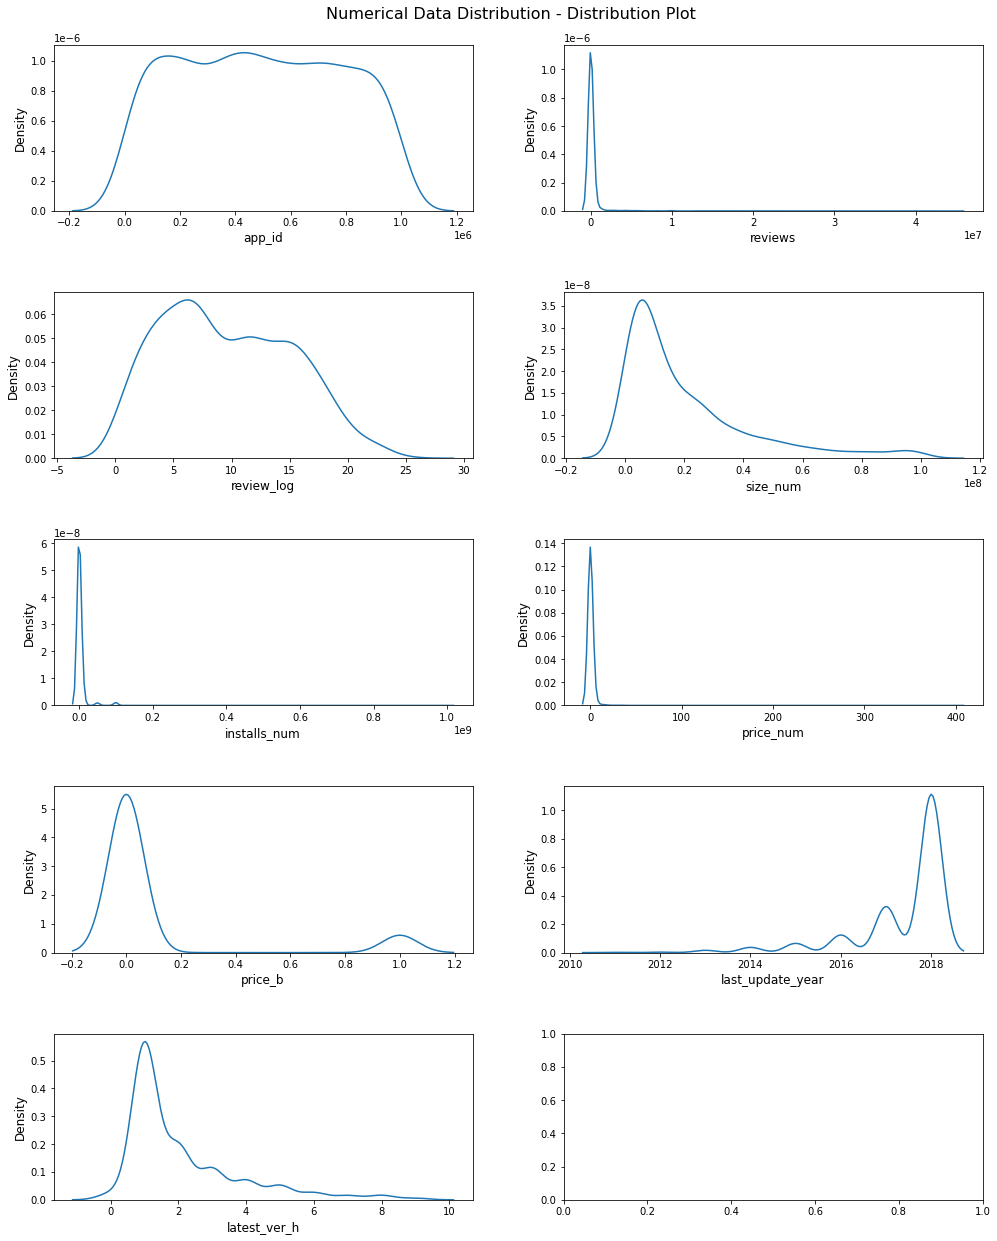

In [59]:
num_dist(train, var_list_n)

In [60]:
## check categorical variables again
train[var_list_c].describe()

,category,size,installs,price,suitable_for,last_update,latest_ver,popularity,popularity_b,category_b
count,1975,1975,1975,1975,1975,1975,1971,1975,1975,1975
unique,33,229,18,41,4,669,922,2,2,8
top,FAMILY,12M,"10,000+",0,Everyone,"August 3, 2018",1.0,High,1,OTHER
freq,409,53,275,1780,1641,56,157,1450,1450,841


## Data Wrangling & Visualization (Testing Set)

In [61]:
## load training data
test = pd.read_csv("I:/3. Application/External_Application/Intern/Data/2022 Data/2022 IBM/Data Challenge/test.csv")

In [62]:
## create new variables

## new variable 1: 'review_c'
# test['review_c'] = pd.cut(test.reviews, bins = [0,100,10000,100000,1000000,50000000],
#                            labels = ['0.1k','10k','100k','1m','50m'])

test['review_c'] = pd.cut(test.reviews, bins = [0,100,10000,100000,1000000,50000000],
                           labels = [0.1, 10, 100, 1000, 50000])
test['review_c'] = test['review_c'].astype(int)

## new variable 2: 'review_log'
test['review_log'] = np.log2(test['reviews'])

## new variable 3: 'size_num'
test["size_num"] = test.apply(lambda row: transform(row, ['size']), axis=1)

## new variable 4: 'installs_num'
test["installs_num"] = test.apply(lambda row: transform_install(row, ['installs']), axis=1)

## new variable 5: 'price_num'
test["price_num"] = test.apply(lambda row: transform_p(row, ["price"]), axis=1)

## new variable 6: 'price_b'
test["price_b"] = test.apply(lambda row: transform_bp(row, ["price"]), axis=1)

## new variable 7: 'last_update_year'
test["last_update_year"] = test.apply(lambda row: transform_y(row, ["last_update"]), axis=1)

## new variable 8: 'latest_ver_h'
test["latest_ver_h"] = test.apply(lambda row: transform_ly(row, ["latest_ver"]), axis=1)

## new variable 9: 'category_b'
test["category_b"] = test.apply(lambda row: transform_bc(row, ["category"]), axis=1)

In [63]:
## check the size of the dataset
print("Number of rows:", test.shape[0])
print("Number of columns:", test.shape[1])

Number of rows: 1018
Number of columns: 18


In [64]:
test.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,review_c,review_log,size_num,installs_num,price_num,price_b,last_update_year,latest_ver_h,category_b
0,144236,TOOLS,262076,1.2M,"10,000,000+",0,Everyone,"January 4, 2018",1.0.2,1000,17.999626,1200000.0,10000000,0.0,0,2018,1,TOOLS
1,881323,PHOTOGRAPHY,12204,6.8M,"1,000,000+",0,Everyone,"March 14, 2017",1.5.2.21,100,13.575066,6800000.0,1000000,0.0,0,2017,1,OTHER
2,765524,TOOLS,632,8.2M,"500,000+",0,Everyone,"May 23, 2017",1.0,10,9.303781,8200000.0,500000,0.0,0,2017,1,TOOLS
3,390533,BUSINESS,29,16M,500+,0,Everyone,"July 5, 2018",2.2.1335,0,4.857981,16000000.0,500,0.0,0,2018,2,OTHER
4,817383,ART_AND_DESIGN,192,6.0M,"10,000+",0,Everyone,"April 25, 2018",1.5,10,7.584963,6000000.0,10000,0.0,0,2018,1,OTHER


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   app_id            1018 non-null   int64  
 1   category          1018 non-null   object 
 2   reviews           1018 non-null   int64  
 3   size              1018 non-null   object 
 4   installs          1018 non-null   object 
 5   price             1018 non-null   object 
 6   suitable_for      1018 non-null   object 
 7   last_update       1018 non-null   object 
 8   latest_ver        1015 non-null   object 
 9   review_c          1018 non-null   int32  
 10  review_log        1018 non-null   float64
 11  size_num          1018 non-null   float64
 12  installs_num      1018 non-null   int64  
 13  price_num         1018 non-null   float64
 14  price_b           1018 non-null   int64  
 15  last_update_year  1018 non-null   int64  
 16  latest_ver_h      1018 non-null   int64  


In [66]:
test.isna().sum()

app_id              0
category            0
reviews             0
size                0
installs            0
price               0
suitable_for        0
last_update         0
latest_ver          3
review_c            0
review_log          0
size_num            0
installs_num        0
price_num           0
price_b             0
last_update_year    0
latest_ver_h        0
category_b          0
dtype: int64

In [67]:
## check numerical variables again
display(pd.DataFrame(num_descriptive(test, var_list_n)))

,Variable,Median,Mean,Standard Deviation,Minimum,Maximum,Range,Kurtosis,Skewness
0,app_id,5.179845e+05,5.130302e+05,2.835015e+05,0.0,9.992400e+05,9.992400e+05,-1.123167,-0.054842
1,reviews,4.255000e+02,1.569706e+05,1.149803e+06,1.0,2.313351e+07,2.313351e+07,225.321075,13.758707
2,review_log,8.732967e+00,9.311848e+00,5.437130e+00,0.0,2.446348e+01,2.446348e+01,-0.780414,0.332337
3,size_num,1.100000e+07,2.028944e+07,2.219822e+07,8500.0,1.000000e+08,9.999150e+07,2.293732,1.683145
4,installs_num,5.000000e+04,3.092815e+06,2.401573e+07,1.0,5.000000e+08,5.000000e+08,359.207743,17.941456
5,price_num,0.000000e+00,3.934381e-01,1.874973e+00,0.0,1.999000e+01,1.999000e+01,63.146443,7.300266
6,price_b,0.000000e+00,8.644401e-02,2.810186e-01,0.0,1.000000e+00,1.000000e+00,6.662805,2.943264
7,last_update_year,2.018000e+03,2.017374e+03,1.109171e+00,2011.0,2.018000e+03,7.000000e+00,6.426821,-2.339990
8,latest_ver_h,1.000000e+00,2.094303e+00,1.747563e+00,0.0,9.000000e+00,9.000000e+00,2.891347,1.783814


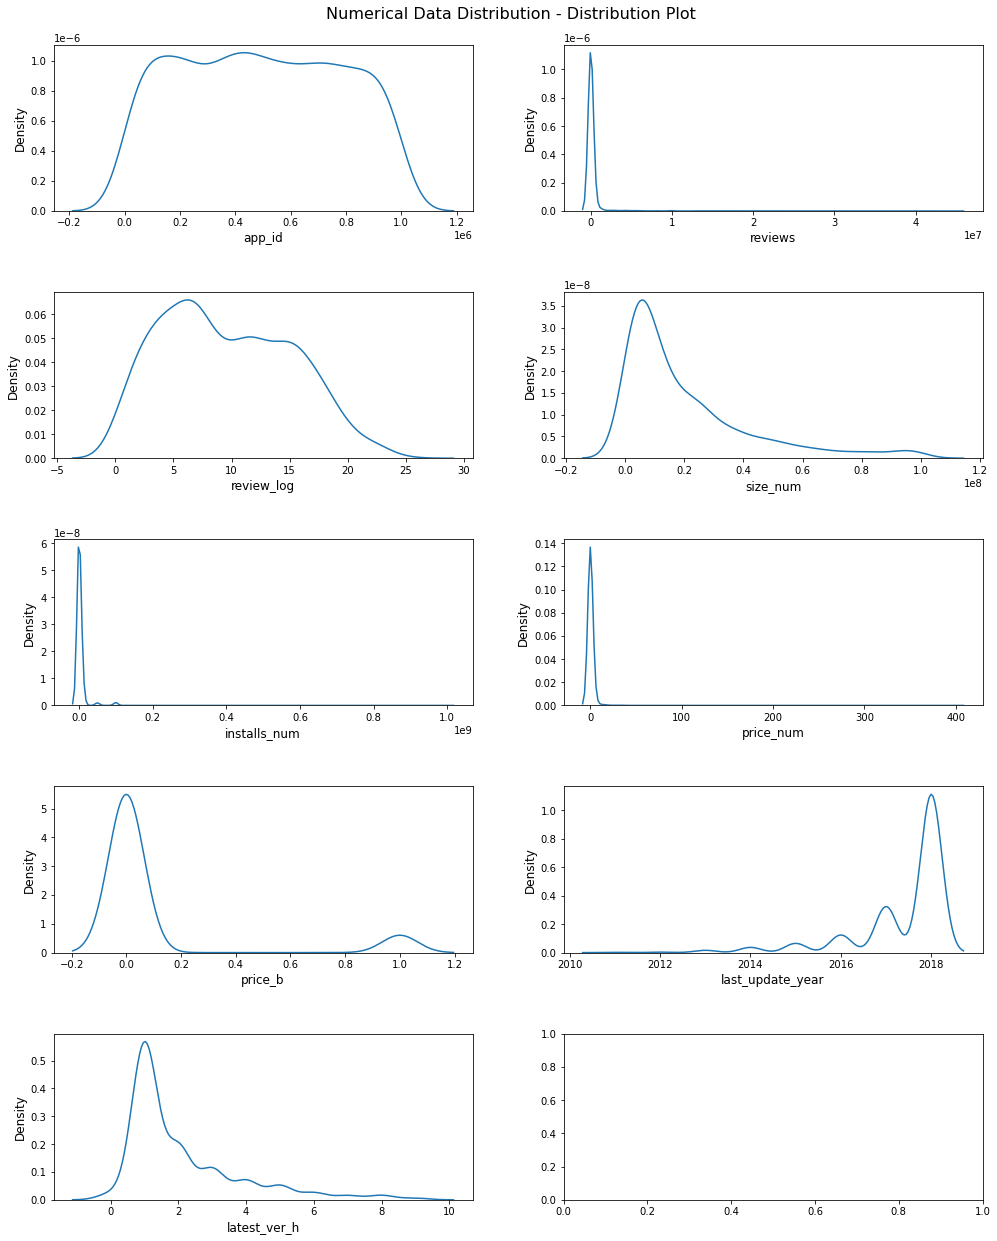

In [68]:
num_dist(train, var_list_n)

In [69]:
## check categorical variables again
# var_list_c.remove('popularity')
# var_list_c.remove('popularity_b')
var_list_c = list(set(var_list_c) - set(['popularity', 'popularity_b']))
test[var_list_c].describe()

,suitable_for,installs,last_update,latest_ver,size,category_b,category,price
count,1018,1018,1018,1015,1018,1018,1018,1018
unique,5,18,464,555,209,8,33,19
top,Everyone,"10,000+","August 3, 2018",1.0,11M,OTHER,FAMILY,0
freq,847,143,28,89,26,458,218,930


## Modeling

###  encoding string variables

In [70]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [71]:
## seperate features(X) from target(y)
# features_list = var_list_c + var_list_n
features_list = list(train.drop(['popularity', 'popularity_b'], axis=1).columns)

In [72]:
## remove useless feature 
features_list.remove('app_id')
features_list.remove('category')
features_list.remove('size')
features_list.remove('last_update')
features_list.remove('latest_ver')
features_list.remove('installs')
features_list.remove('price')

In [73]:
features_list

['reviews',
 'suitable_for',
 'review_c',
 'review_log',
 'size_num',
 'installs_num',
 'price_num',
 'price_b',
 'category_b',
 'last_update_year',
 'latest_ver_h']

In [74]:
X = train[features_list]
y = train['popularity_b']

In [75]:
print('data dimensions', X.shape)

data dimensions (1975, 11)


In [76]:
features_to_encode = X.select_dtypes(include = ['object', 'category']).columns
features_to_encode

Index(['suitable_for', 'category_b'], dtype='object')

In [77]:
# X.head()
X[features_to_encode].head()

,suitable_for,category_b
0,Everyone,OTHER
1,Teen,GAME
2,Teen,FAMILY
3,Teen,FAMILY
4,Mature 17+,OTHER


In [78]:
X_num = X.drop(columns = features_to_encode)
X_num

,reviews,review_c,review_log,size_num,installs_num,price_num,price_b,last_update_year,latest_ver_h
0,4,0,2.000000,511000.0,50,0.00,0,2016,1
1,568391,1000,19.116524,5200000.0,5000000,0.00,0,2014,4
2,144,10,7.169925,70000000.0,1000,2.99,1,2018,1
3,1499466,50000,20.516017,96000000.0,10000000,0.00,0,2018,1
4,84,0,6.392317,4500000.0,1000,0.00,0,2018,8
...,...,...,...,...,...,...,...,...,...
1970,3883589,50000,21.888959,57000000.0,100000000,0.00,0,2018,2
1971,5898,10,12.526010,50000000.0,100000,0.00,0,2017,3
1972,16,0,4.000000,8900000.0,500,1.99,1,2017,1
1973,9612,10,13.230621,3500000.0,100000,0.00,0,2018,1


In [79]:
## encode labels with value between 0 and n_classes-1.
le = LabelEncoder()

In [80]:
X_trans = X[features_to_encode].apply(le.fit_transform)
X_trans.head()

,suitable_for,category_b
0,0,6
1,3,2
2,3,0
3,3,0
4,2,6


In [81]:
X_num[features_to_encode] = X_trans
X_num.head()
# X[features_to_encode].head()

,reviews,review_c,review_log,size_num,installs_num,price_num,price_b,last_update_year,latest_ver_h,suitable_for,category_b
0,4,0,2.000000,511000.0,50,0.00,0,2016,1,0,6
1,568391,1000,19.116524,5200000.0,5000000,0.00,0,2014,4,3,2
2,144,10,7.169925,70000000.0,1000,2.99,1,2018,1,3,0
3,1499466,50000,20.516017,96000000.0,10000000,0.00,0,2018,1,3,0
4,84,0,6.392317,4500000.0,1000,0.00,0,2018,8,2,6


### sklearn - RandomForestClassifier

In [82]:
## load needed packages
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

In [83]:
## display xgboost version
print(sklearn.__version__)

0.24.2


In [84]:
## Create training and test splits
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size = 0.4, random_state = 101)

In [85]:
X_train.head()

,reviews,review_c,review_log,size_num,installs_num,price_num,price_b,last_update_year,latest_ver_h,suitable_for,category_b
913,45,0,5.491853,21000000.0,5000,3.99,1,2017,2,0,5
37,1764,10,10.784635,8300000.0,10000,3.99,1,2016,1,1,0
1169,776730,1000,19.567054,49000000.0,10000000,0.00,0,2018,2,1,2
1348,556,10,9.118941,23000000.0,100000,0.00,0,2018,2,3,6
1951,18,0,4.169925,1300000.0,50,0.00,0,2018,1,0,0


In [86]:
X_test.head()

,reviews,review_c,review_log,size_num,installs_num,price_num,price_b,last_update_year,latest_ver_h,suitable_for,category_b
183,227401,1000,17.794879,91000000.0,5000000,0.0,0,2018,1,0,0
1204,23,0,4.523562,17000000.0,10000,0.0,0,2016,1,0,0
877,70,0,6.129283,3200000.0,1000,0.0,0,2018,1,0,7
1948,304,10,8.247928,4700000.0,10000,0.0,0,2018,1,3,0
218,1312936,50000,20.324365,21000000.0,10000000,0.0,0,2018,3,0,6


#### Tuning RandomForest Model with Grid Search

In [87]:
rf = RandomForestClassifier()

In [88]:
param_grid = {
    'n_estimators': [50, 75, 100, 125, 150, 175, 200],
    'max_features': [4, 6, 8, 10],
}

In [89]:
gs1 = GridSearchCV(rf, param_grid, cv = 4)

In [90]:
gs1.fit(X_train, y_train)
print("best params:", gs1.best_params_)

best params: {'max_features': 4, 'n_estimators': 200}


In [91]:
gs2 = GridSearchCV(rf, param_grid, cv = 5)

In [92]:
gs2.fit(X_train, y_train)
print("best params:", gs2.best_params_)

best params: {'max_features': 4, 'n_estimators': 200}


#### Tuning RandomForest with Encode(pipe)

In [93]:
# Problem: predict with pipeline
## solution1: Do OneHotEncode outside the model
## solution2: Search for predict with pipeline --> handle_unknown='ignore'

In [94]:
OneHotpipe = make_pipeline(OneHotEncoder(sparse = False, handle_unknown='ignore'))

In [95]:
transformer = ColumnTransformer(
    transformers=[("oh_encode", OneHotpipe, features_to_encode)])

In [96]:
rf_pipe = Pipeline(steps = [("prep", transformer),
                            ("rf", RandomForestClassifier())])

In [97]:
_ = rf_pipe.fit(X_train, y_train)

In [98]:
preds = rf_pipe.predict(X_test)

In [99]:
print(f"The accuracy of the model is {round(accuracy_score(y_test, preds),3)*100} %")

The accuracy of the model is 71.89999999999999 %


In [100]:
confusion_matrix(y_test, preds, labels=["1", "0"])

array([[568,   0],
       [222,   0]], dtype=int64)

In [101]:
y_test.value_counts()

1    568
0    222
Name: popularity_b, dtype: int64

In [102]:
pd.DataFrame(preds).value_counts()

1    790
dtype: int64

#### Tuning RandomForest Model(Grid Search) with Encode(pipe)

https://scikit-learn.org/stable/modules/compose.html

In [111]:
gs_pipe = Pipeline(steps = [("prep", transformer),
                            ("model", gs1)])

In [116]:
gs_pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('oh_encode',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['suitable_for', 'category_b'], dtype='object'))])),
                ('model',
                 GridSearchCV(cv=4, estimator=RandomForestClassifier(),
                              param_grid={'max_features': [4, 6, 8, 10],
                                          'n_estimators': [50, 75, 100, 125,
                                                           150, 175, 200]}))])

In [119]:
gs_pipe['prep'].transformers_

[('oh_encode',
  Pipeline(steps=[('onehotencoder',
                   OneHotEncoder(handle_unknown='ignore', sparse=False))]),
  Index(['suitable_for', 'category_b'], dtype='object')),
 ('remainder', 'drop', [0, 1, 2, 3, 4, 5, 6, 7, 8])]

In [120]:
gs_pipe['model'].gs1_

AttributeError: 'GridSearchCV' object has no attribute 'gs1_'

In [118]:
gs_pipe['prep'].transformers_[1][1]\
#     ['model'].get_feature_names(categorical_features)

'drop'

In [113]:
print("best params:", gs_pipe.best_params_)

AttributeError: 'Pipeline' object has no attribute 'best_params_'

#### Basic RandomForest Model

In [103]:
rf = RandomForestClassifier(n_estimators = 75,
                            max_features = 6, 
                            random_state = 101,
                            bootstrap = True)

In [104]:
col_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown='ignore'), features_to_encode),
                        remainder = "passthrough")
# col_trans 

In [105]:
pipe = make_pipeline(col_trans, rf)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['suitable_for', 'category_b'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=6, n_estimators=75,
                                        random_state=101))])

In [106]:
y_pred = pipe.predict(X_test)

In [107]:
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),3)*100} %")

The accuracy of the model is 75.4 %


In [108]:
confusion_matrix(y_test, y_pred, labels=["1", "0"])

array([[514,  54],
       [140,  82]], dtype=int64)

In [109]:
y_test.value_counts()

1    568
0    222
Name: popularity_b, dtype: int64

In [110]:
y_pred = pd.DataFrame(y_pred)
y_pred.value_counts()

1    654
0    136
dtype: int64

###### Check variable importance

###  Onehotencoding string variables

In [130]:
## creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [131]:
#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(X[features_to_encode]).toarray())
# encoder_df = pd.DataFrame(encoder.fit_transform(train['category']).toarray())

In [132]:
encoder.get_feature_names()
encoder_df.columns = encoder.get_feature_names()

In [134]:
encoder_df.head()

,x0_1+,"x0_1,000+","x0_1,000,000+","x0_1,000,000,000+",x0_10+,"x0_10,000+","x0_10,000,000+",x0_100+,"x0_100,000+","x0_100,000,000+",...,x3_1000.0,x3_50000.0,x4_0,x4_1,x4_2,x4_3,x4_4,x4_5,x4_6,x4_7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
encoder_df.columns

Index(['x0_1+', 'x0_1,000+', 'x0_1,000,000+', 'x0_1,000,000,000+', 'x0_10+',
       'x0_10,000+', 'x0_10,000,000+', 'x0_100+', 'x0_100,000+',
       'x0_100,000,000+', 'x0_5+', 'x0_5,000+', 'x0_5,000,000+', 'x0_50+',
       'x0_50,000+', 'x0_50,000,000+', 'x0_500+', 'x0_500,000+', 'x1_$0.99',
       'x1_$1.49', 'x1_$1.59', 'x1_$1.75', 'x1_$1.76', 'x1_$1.97', 'x1_$1.99',
       'x1_$10.00', 'x1_$11.99', 'x1_$12.99', 'x1_$14.00', 'x1_$14.99',
       'x1_$15.46', 'x1_$15.99', 'x1_$17.99', 'x1_$19.40', 'x1_$2.49',
       'x1_$2.56', 'x1_$2.59', 'x1_$2.99', 'x1_$24.99', 'x1_$29.99',
       'x1_$3.04', 'x1_$3.49', 'x1_$3.99', 'x1_$33.99', 'x1_$379.99',
       'x1_$399.99', 'x1_$4.29', 'x1_$4.49', 'x1_$4.60', 'x1_$4.99',
       'x1_$5.49', 'x1_$5.99', 'x1_$6.49', 'x1_$6.99', 'x1_$7.99', 'x1_$79.99',
       'x1_$8.99', 'x1_$9.99', 'x1_0', 'x2_Everyone', 'x2_Everyone 10+',
       'x2_Mature 17+', 'x2_Teen', 'x3_0.1', 'x3_10.0', 'x3_100.0',
       'x3_1000.0', 'x3_50000.0', 'x4_0', 'x4_1', 'x4_2

In [ ]:

#merge one-hot encoded columns back with original DataFrame
train_encode = train.join(encoder_df)

#view final df
print(train_encode)

In [ ]:
# ! pip install xgboost

In [ ]:
## load needed packages
import xgboost as xgb

In [ ]:
## display xgboost version
print(xgb.__version__)